# LOG635 -  Arbre de décision

Dans ce Jupyter notebook nous verrons:

* 1 - voir comment les arbres de décision divisent l'espace des caractéristiques
* 2 - Appliquer une arbre de décision pour un problème de diagnostique médical.

# Visualisation: Comment l'arbre de décision divise l'espace des caractéristiques?

### Import modules 


In [1]:
import pandas as pd # to load and visualize the data.
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_moons

In [2]:
def plot_dataset(X, y, ax=None, title=None, **params):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', **params)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    if title is not None:
        ax.set_title(title)
    return ax


def make_grid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_classifier_decision(ax, clf, X, mode='line', **params):
    xx, yy = make_grid(X[:, 0], X[:, 1])

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if mode == 'line':
        ax.contour(xx, yy, Z, **params)
    else:
        ax.contourf(xx, yy, Z, **params)
    ax.set_xlim((np.min(X[:, 0]), np.max(X[:, 0])))
    ax.set_ylim((np.min(X[:, 1]), np.max(X[:, 0])))

## création d'un ensemble de données synthétiques

In [4]:
from sklearn.datasets import make_moons
NOISE = 0.3
X, y = make_moons(n_samples=500, noise=NOISE, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Modification de la profondeur des arbres (profondeur = 1)

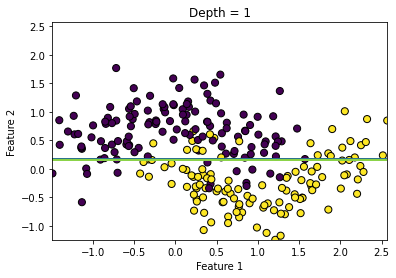

In [5]:
dt_1 = DecisionTreeClassifier(max_depth=1)
dt_1.fit(X_train, y_train)
ax = plot_dataset(X_train, y_train, title='Depth = 1')
plot_classifier_decision(ax, dt_1, X_train)

## profondeur = 2

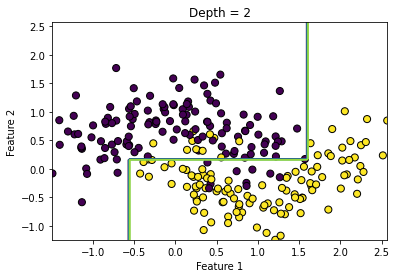

In [6]:
dt_2 = DecisionTreeClassifier(max_depth=2)
dt_2.fit(X_train, y_train)
ax = plot_dataset(X_train, y_train, title='Depth = 2')
plot_classifier_decision(ax, dt_2, X_train)

# profondeur = 5

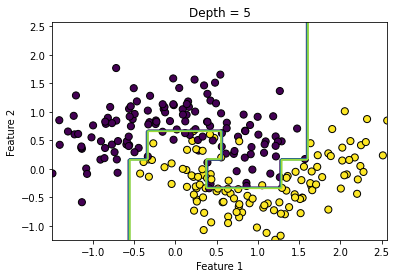

In [7]:
dt_5 = DecisionTreeClassifier(max_depth=5)
dt_5.fit(X_train, y_train)
ax = plot_dataset(X_train, y_train, title='Depth = 5')
plot_classifier_decision(ax, dt_5, X_train)

#  profondeur = 10

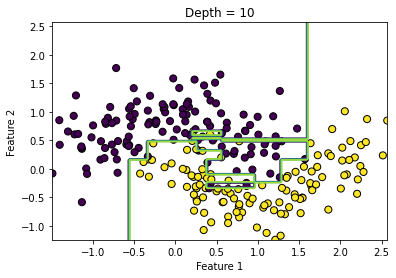

In [8]:
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_10.fit(X_train, y_train)
ax = plot_dataset(X_train, y_train, title='Depth = 10')
plot_classifier_decision(ax, dt_10, X_train)

***

# diagnostiquer une maladie cardiaque
----

Dans ce Jupyter Notebook nous allons appliquer les algorithmes d'apprentissage machine pour faire la clasification pour prédire si un patient a ou non une maladie cardiaque. Le jeux de données vient du repositore OpenML: https://www.openml.org/d/53

Nous utiliseront la bilbiothèque **scikit-learn** pour l'implementation des algo d'apprentissage machine et Pandas pour afficher et traiter les données.

Ce problème contient variables qui sont numeriques et catégoriques. Donc, un cas excellent pourvoir les concepts vus en classe (arbres de décision). 

Nous verrons aussi comment afficher une arbre de décision pour expliquer la décision de notre systeme intelligent.

**Les arbres de décision** sont une méthode d'apprentissage automatique exceptionnellement utile lorsque vous avez besoin de savoir comment les décisions sont prises. Par exemple, si vous devez justifier les prédictions à votre patron, **Les arbres de décision** sont une bonne méthode car chaque étape du processus de prise de décision est facile à comprendre.

Ce Notebook suppose que vous connaissez déjà les bases du codage en Python et que vous connaissez la théorie derrière les algos: Arbre de décision, k-PlusProche voisins (kNN) et le classificateurs bayésien naïf.

**NOTE:** Vous aurez besoin de ** Python 3 ** et des bibliothèques suivantes. Si vous utilisez Google Colab, tout est déjà installé

- pandas
- numpy
- sklearn

Voici la description des attributs (caractéristiques) du problème:

- 1. age 
- 2. sex 
- 3. chest pain type (4 values) 
- 4. resting blood pressure
- 5. serum cholestoral in mg/dl 
- 6. fasting blood sugar > 120 mg/dl 
- 7. resting electrocardiographic results (values 0,1,2) -- 8. maximum heart rate achieved
- 9. exercise induced angina 
- 10. oldpeak = ST depression induced by exercise relative to rest 
- 11. the slope of the peak exercise ST segment 
- 12. number of major vessels (0-3) colored by flourosopy 
- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


- **Class**. Present, absent

## Je vous encourage fortement à jouer avec le code. Jouer avec le code est le meilleur moyen d'apprendre.

# Charger le jeu de données

Lorsque **pandas (pd)** lit des données, il renvoie un **dataframe**, qui ressemble beaucoup à Excel. Les données sont organisées en lignes et en colonnes et chaque ligne peut contenir un mélange de texte et de nombres. 

In [9]:
## Pandas pour loader le fichier CSV
heart_df = pd.read_csv('dataset_53_heart-statlog.csv')

In [10]:
heart_df['age']

0      70
1      67
2      57
3      64
4      74
       ..
265    52
266    44
267    56
268    57
269    67
Name: age, Length: 270, dtype: int64

Now that we have loaded the data into a **dataframe** called **df**, let's look at the first five rows using the `head()` function:

In [11]:
## Afffiche 5 lignes
heart_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [12]:
## dtypes tell us the "data type" for each column
heart_df

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,absent
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,absent
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,absent
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,absent


# Division entrainement et test


## Les attributs 

In [13]:
X = heart_df.drop('class', axis=1).copy()
X.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


### les étiquettes (cibles) que nous voulons prédire


In [15]:
y = heart_df['class'].copy()
y.head()

0    present
1     absent
2    present
3     absent
4     absent
Name: class, dtype: object

Maintenant que nous avons créé **X**, qui contient les données que nous voulons utiliser pour faire des prédictions, et **y**, qui contient les données que nous voulons prédire, Il ne nous reste plus qu'à diviser les données en deux ensembles, **train** et **test**.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

# Arbre de Décision


In [18]:
## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
print(f"Score {clf_dt.score(X_test, y_test)}")

Score 0.7333333333333333


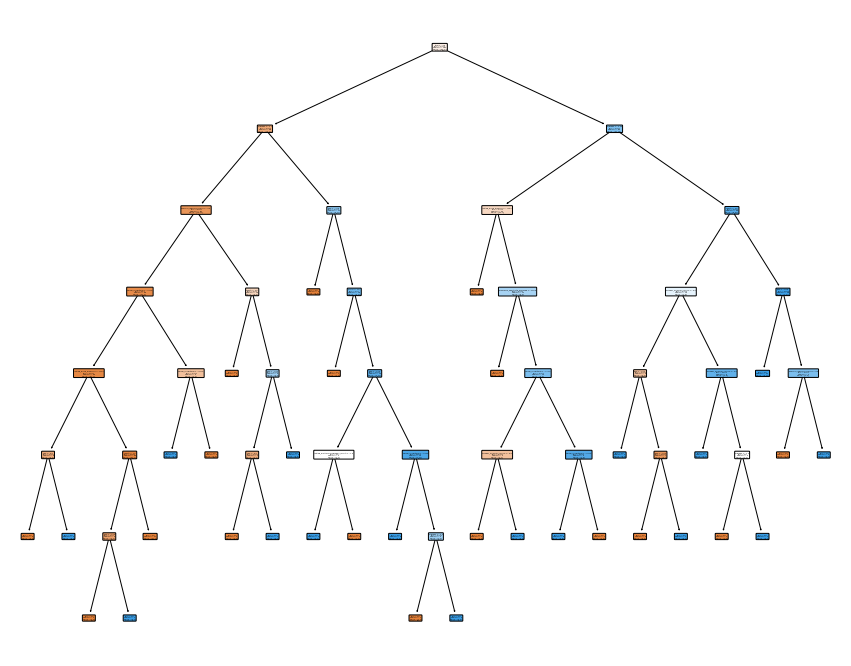

In [19]:
## NOTE: Nous pouvons tracer l'arbre et elle est énorme !
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Non", "Oui"], 
          feature_names=X.columns); 

OK, nous avons construit un **Arbre de Décision** pour la classification. Voyons comment il fonctionne sur le **Jeu de données de test** en faisant descendre le **Jeu de données de test** dans l'arbre et en dessinant une **Matrice de confusion**.

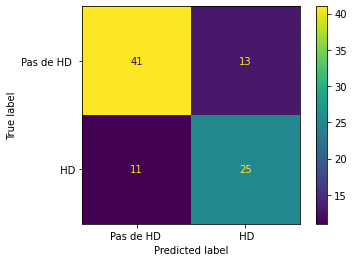

In [20]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Pas de HD ", " HD"])

### Tree Depth

In [21]:
## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
clf_dt = clf_dt.fit(X_train, y_train)
print(f"Score {clf_dt.score(X_test, y_test)}")

Score 0.7666666666666667


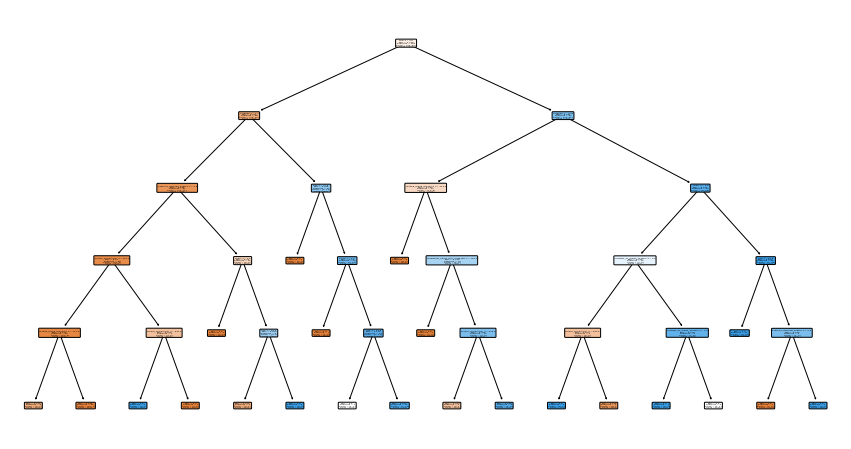

In [22]:
plt.figure(figsize=(15, 8))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Non", "Oui"], 
          feature_names=X.columns); 

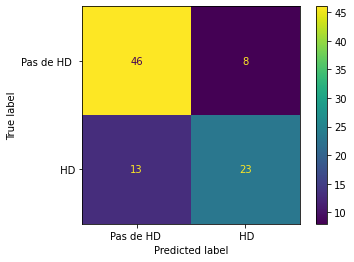

In [23]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Pas de HD ", " HD"])

## Quel attribut est le plus important pour la décision ?

Avec un arbre de décision, nous pouvons également savoir (sur la base des valeurs d'entropie, quel attribut est le plus important pour prendre la décision).

<AxesSubplot:>

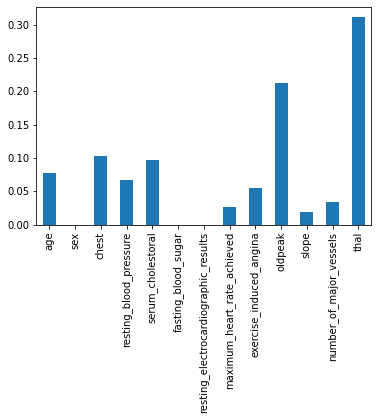

In [25]:
feature_importances = pd.Series(clf_dt.feature_importances_, index=X.columns)
feature_importances.plot.bar()
